In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from utils.ShipDataset import get_ship_dataset, load_image

import torch.optim as optim
from utils.Training import TrainingHelper, PlotReporter, ConsoleReporter

In [24]:
train_batch = 32
valid_batch = 64

train_dataset, valid_dataset = get_ship_dataset("./dataset/class", 10000, validation=0.1)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=valid_batch, shuffle=False)

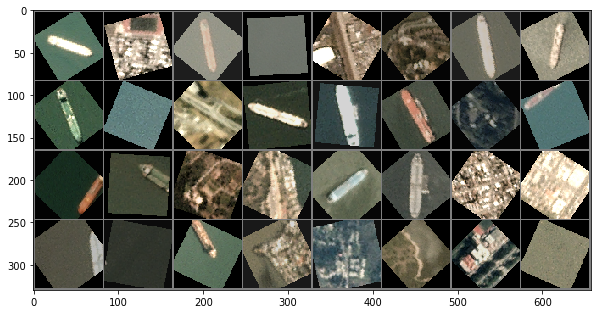

In [25]:
# Try to show some training images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
data_iter = iter(train_loader)
images, lables = data_iter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [26]:
# Fully connected network with 100 hidden heuron
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self, ILayer, HLayer, OLayer):
       super(FCNet, self).__init__()
       self.layer1 = torch.nn.Linear(ILayer, HLayer)
       self.layer2 = torch.nn.Linear(HLayer, OLayer)
    
    def forward(self, x):
      #print(x.shape)
      x = x.view(x.size(0), -1)
      #print(x.shape)
      x = F.relu(self.layer1(x))
      x = torch.sigmoid(self.layer2(x))
      return x

net = FCNet(3*80*80, 100, 1)
model = nn.DataParallel(net)
#print(next(model.parameters()).is_cuda)

inputs, labels = next(iter(train_loader))

In [27]:
cuda0 = torch.device('cuda:0')

model = nn.DataParallel(model, device_ids=[0])
result = model(inputs)
model.to(cuda0)

DataParallel(
  (module): DataParallel(
    (module): FCNet(
      (layer1): Linear(in_features=19200, out_features=100, bias=True)
      (layer2): Linear(in_features=100, out_features=1, bias=True)
    )
  )
)

In [28]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [16]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(cuda0)
        labels = labels.to(cuda0)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

[1,    10] loss: 1.251
[1,    20] loss: 0.711
[1,    30] loss: 0.459
[1,    40] loss: 0.476
[1,    50] loss: 0.617
[1,    60] loss: 0.547
[1,    70] loss: 0.441
[1,    80] loss: 0.418
[1,    90] loss: 0.479
[1,   100] loss: 0.385
[1,   110] loss: 0.397
[1,   120] loss: 0.378
[1,   130] loss: 0.432
[1,   140] loss: 0.552
[1,   150] loss: 0.538
[1,   160] loss: 0.533
[1,   170] loss: 0.355
[1,   180] loss: 0.341
[1,   190] loss: 0.338
[1,   200] loss: 0.305
[1,   210] loss: 0.406
[1,   220] loss: 0.367
[1,   230] loss: 0.287
[1,   240] loss: 0.424
[1,   250] loss: 0.327
[1,   260] loss: 0.297
[1,   270] loss: 0.617
[1,   280] loss: 0.358
[1,   290] loss: 0.411
[1,   300] loss: 0.311
[1,   310] loss: 0.385
[2,    10] loss: 0.324
[2,    20] loss: 0.388
[2,    30] loss: 0.343
[2,    40] loss: 0.279
[2,    50] loss: 0.336
[2,    60] loss: 0.307
[2,    70] loss: 0.290
[2,    80] loss: 0.322
[2,    90] loss: 0.291
[2,   100] loss: 0.293
[2,   110] loss: 0.336
[2,   120] loss: 0.321
[2,   130] 

[12,   130] loss: 0.153
[12,   140] loss: 0.205
[12,   150] loss: 0.195
[12,   160] loss: 0.174
[12,   170] loss: 0.209
[12,   180] loss: 0.172
[12,   190] loss: 0.268
[12,   200] loss: 0.162
[12,   210] loss: 0.176
[12,   220] loss: 0.166
[12,   230] loss: 0.165
[12,   240] loss: 0.154
[12,   250] loss: 0.155
[12,   260] loss: 0.179
[12,   270] loss: 0.138
[12,   280] loss: 0.203
[12,   290] loss: 0.161
[12,   300] loss: 0.196
[12,   310] loss: 0.196
[13,    10] loss: 0.194
[13,    20] loss: 0.279
[13,    30] loss: 0.237
[13,    40] loss: 0.261
[13,    50] loss: 0.302
[13,    60] loss: 0.195
[13,    70] loss: 0.179
[13,    80] loss: 0.176
[13,    90] loss: 0.237
[13,   100] loss: 0.194
[13,   110] loss: 0.168
[13,   120] loss: 0.195
[13,   130] loss: 0.207
[13,   140] loss: 0.209
[13,   150] loss: 0.175
[13,   160] loss: 0.186
[13,   170] loss: 0.168
[13,   180] loss: 0.140
[13,   190] loss: 0.205
[13,   200] loss: 0.151
[13,   210] loss: 0.198
[13,   220] loss: 0.147
[13,   230] loss

[23,   140] loss: 0.116
[23,   150] loss: 0.198
[23,   160] loss: 0.135
[23,   170] loss: 0.164
[23,   180] loss: 0.180
[23,   190] loss: 0.188
[23,   200] loss: 0.175
[23,   210] loss: 0.146
[23,   220] loss: 0.187
[23,   230] loss: 0.215
[23,   240] loss: 0.113
[23,   250] loss: 0.143
[23,   260] loss: 0.146
[23,   270] loss: 0.141
[23,   280] loss: 0.170
[23,   290] loss: 0.136
[23,   300] loss: 0.210
[23,   310] loss: 0.109
[24,    10] loss: 0.138
[24,    20] loss: 0.153
[24,    30] loss: 0.153
[24,    40] loss: 0.143
[24,    50] loss: 0.152
[24,    60] loss: 0.145
[24,    70] loss: 0.192
[24,    80] loss: 0.158
[24,    90] loss: 0.152
[24,   100] loss: 0.147
[24,   110] loss: 0.174
[24,   120] loss: 0.162
[24,   130] loss: 0.151
[24,   140] loss: 0.162
[24,   150] loss: 0.111
[24,   160] loss: 0.133
[24,   170] loss: 0.153
[24,   180] loss: 0.156
[24,   190] loss: 0.131
[24,   200] loss: 0.135
[24,   210] loss: 0.139
[24,   220] loss: 0.134
[24,   230] loss: 0.149
[24,   240] loss

In [17]:
# Numper of parameters
sum([p.numel() for p in net.parameters()])

1920201

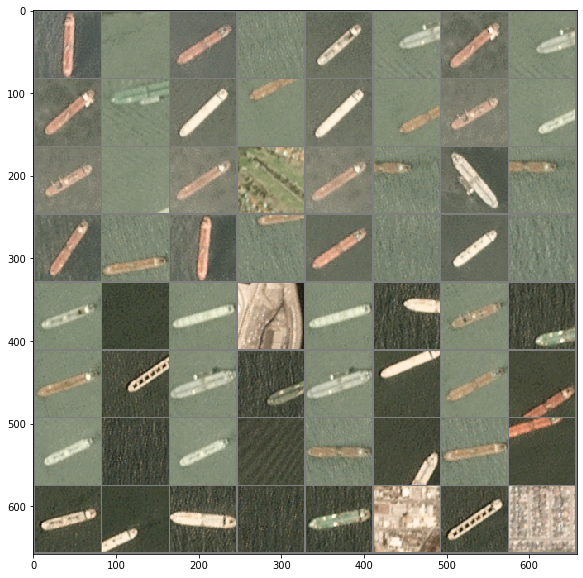

GroundTruth:  tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.]) tensor([1.]) tensor([0.])


In [26]:
dataiter = iter(valid_loader)
images, labels = dataiter.next()

# print images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(64)))

Try deep fully connected network

In [28]:
# Input layer: 3*80*80
# 1. hidden layer: 1000
# 2. hidden layer: 100
# 3. hidden layer: 10
# Output layer: 1
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self):
       super(FCNet, self).__init__()
       self.layer1 = torch.nn.Linear(3*80*80, 1000)
       self.layer2 = torch.nn.Linear(1000, 100)
       self.layer3 = torch.nn.Linear(100, 10)
       self.layer4 = torch.nn.Linear(10, 1)
    
    def forward(self, x):
      #print(x.shape)
      x = x.view(x.size(0), -1)
      #print(x.shape)
      x = F.relu(self.layer1(x))
      x = F.relu(self.layer2(x))
      x = F.relu(self.layer3(x))
      x = torch.sigmoid(self.layer4(x))
      return x

net = FCNet()
model = nn.DataParallel(net)
#print(next(model.parameters()).is_cuda)

# Test the forward pass of the network
inputs, labels = next(iter(train_loader))
inputs = inputs.cuda()
labels = labels.cuda()
x = model.forward(inputs)
print(inputs.shape, x.shape)

torch.Size([32, 3, 80, 80]) torch.Size([32, 1])


In [29]:
# Numper of parameters
sum([p.numel() for p in net.parameters()])

19302121

In [30]:
cuda0 = torch.device('cuda:0')

model = nn.DataParallel(model, device_ids=[0])
result = model(inputs)
model.to(cuda0)

DataParallel(
  (module): DataParallel(
    (module): FCNet(
      (layer1): Linear(in_features=19200, out_features=1000, bias=True)
      (layer2): Linear(in_features=1000, out_features=100, bias=True)
      (layer3): Linear(in_features=100, out_features=10, bias=True)
      (layer4): Linear(in_features=10, out_features=1, bias=True)
    )
  )
)

In [31]:
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [32]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(cuda0)
        labels = labels.to(cuda0)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    
    print('[%d, %5d] loss: %.3f' %
          (epoch + 1, i + 1, running_loss/len(train_loader)))
    running_loss = 0.0

print('Finished Training')

[1,   313] loss: 0.445
[2,   313] loss: 0.314
[3,   313] loss: 0.260
[4,   313] loss: 0.232
[5,   313] loss: 0.200
[6,   313] loss: 0.194
[7,   313] loss: 0.200
[8,   313] loss: 0.186
[9,   313] loss: 0.179
[10,   313] loss: 0.174
[11,   313] loss: 0.173
[12,   313] loss: 0.166
[13,   313] loss: 0.161
[14,   313] loss: 0.162
[15,   313] loss: 0.161
[16,   313] loss: 0.148
[17,   313] loss: 0.147
[18,   313] loss: 0.147
[19,   313] loss: 0.148
[20,   313] loss: 0.147
[21,   313] loss: 0.144
[22,   313] loss: 0.142
[23,   313] loss: 0.136
[24,   313] loss: 0.143
[25,   313] loss: 0.143
[26,   313] loss: 0.138
[27,   313] loss: 0.131
[28,   313] loss: 0.131
[29,   313] loss: 0.126
[30,   313] loss: 0.135
Finished Training


In [33]:
def binary_accuracy(x, labels):
    return ((x > 0.5).float() == labels).sum().numpy() / len(labels)
val_loss, val_acc = 0,0
with torch.no_grad():
    for data in valid_loader:
        inputs, labels = data
        inputs = inputs.to(cuda0)
        labels = labels.to(cuda0)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        val_acc += binary_accuracy(outputs.cpu(), labels.cpu())
    val_loss /= len(valid_loader)
    val_acc /= len(valid_loader)
val_loss, val_acc

(0.11595083028078079, 0.9626736111111112)

Deep FC network with 20*20 images

In [29]:
# Rescale images to 20*20
train_dataset, valid_dataset = get_ship_dataset("./dataset/class", 10000, validation=0.1, resize=(20,20))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=valid_batch, shuffle=False)

In [30]:
# Input layer: 3*20*20
# 1. hidden layer: 1000
# 2. hidden layer: 100
# 3. hidden layer: 10
# Output layer: 1
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self):
       super(FCNet, self).__init__()
       self.layer1 = torch.nn.Linear(3*20*20, 1000)
       self.layer2 = torch.nn.Linear(1000, 100)
       self.layer3 = torch.nn.Linear(100, 10)
       self.layer4 = torch.nn.Linear(10, 1)
    
    def forward(self, x):
      #print(x.shape)
      x = x.view(x.size(0), -1)
      #print(x.shape)
      x = F.relu(self.layer1(x))
      x = F.relu(self.layer2(x))
      x = F.relu(self.layer3(x))
      x = torch.sigmoid(self.layer4(x))
      return x     
# a fc network with 100 hidden neurons
net = FCNet()
model = nn.DataParallel(net)

inputs, labels = next(iter(train_loader))

In [31]:
# Numper of parameters
sum([p.numel() for p in net.parameters()])

1302121

In [32]:
cuda0 = torch.device('cuda:0')

model = nn.DataParallel(model, device_ids=[0])
result = model(inputs)
model.to(cuda0)

DataParallel(
  (module): DataParallel(
    (module): FCNet(
      (layer1): Linear(in_features=1200, out_features=1000, bias=True)
      (layer2): Linear(in_features=1000, out_features=100, bias=True)
      (layer3): Linear(in_features=100, out_features=10, bias=True)
      (layer4): Linear(in_features=10, out_features=1, bias=True)
    )
  )
)

In [46]:
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(cuda0)
        labels = labels.to(cuda0)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    
    print('[%d, %5d] loss: %.3f' %
          (epoch + 1, i + 1, running_loss/len(train_loader)))
    running_loss = 0.0

print('Finished Training')

[1,   313] loss: 0.458
[2,   313] loss: 0.331
[3,   313] loss: 0.270
[4,   313] loss: 0.243
[5,   313] loss: 0.214
[6,   313] loss: 0.209
[7,   313] loss: 0.195
[8,   313] loss: 0.190
[9,   313] loss: 0.185
[10,   313] loss: 0.169
[11,   313] loss: 0.162
[12,   313] loss: 0.176
[13,   313] loss: 0.175
[14,   313] loss: 0.163
[15,   313] loss: 0.170
[16,   313] loss: 0.161
[17,   313] loss: 0.154
[18,   313] loss: 0.158
[19,   313] loss: 0.152
[20,   313] loss: 0.153
[21,   313] loss: 0.154
[22,   313] loss: 0.147
[23,   313] loss: 0.147
[24,   313] loss: 0.143
[25,   313] loss: 0.152
[26,   313] loss: 0.142
[27,   313] loss: 0.150
[28,   313] loss: 0.147
[29,   313] loss: 0.152
[30,   313] loss: 0.136
Finished Training


In [47]:
def binary_accuracy(x, labels):
    return ((x > 0.5).float() == labels).sum().numpy() / len(labels)
val_loss, val_acc = 0,0
with torch.no_grad():
    for data in valid_loader:
        inputs, labels = data
        inputs = inputs.to(cuda0)
        labels = labels.to(cuda0)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        val_acc += binary_accuracy(outputs.cpu(), labels.cpu())
    val_loss /= len(valid_loader)
    val_acc /= len(valid_loader)
val_loss, val_acc

(0.07089385017752647, 0.9704861111111112)

Single 500-neuron hidden layer

In [35]:
train_batch = 32
valid_batch = 64

train_dataset, valid_dataset = get_ship_dataset("./dataset/class", 10000, validation=0.1)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_batch, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=valid_batch, shuffle=False)

In [36]:
# Fully connected network with 500 hidden heuron
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self, ILayer, HLayer, OLayer):
       super(FCNet, self).__init__()
       self.layer1 = torch.nn.Linear(ILayer, HLayer)
       self.layer2 = torch.nn.Linear(HLayer, OLayer)
    
    def forward(self, x):
      #print(x.shape)
      x = x.view(x.size(0), -1)
      #print(x.shape)
      x = F.relu(self.layer1(x))
      x = torch.sigmoid(self.layer2(x))
      return x

net = FCNet(3*80*80, 500, 1)
model = nn.DataParallel(net)

inputs, labels = next(iter(train_loader))

In [37]:
cuda0 = torch.device('cuda:0')

model = nn.DataParallel(model, device_ids=[0])
result = model(inputs)
model.to(cuda0)

DataParallel(
  (module): DataParallel(
    (module): FCNet(
      (layer1): Linear(in_features=19200, out_features=500, bias=True)
      (layer2): Linear(in_features=500, out_features=1, bias=True)
    )
  )
)

In [38]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [22]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(cuda0)
        labels = labels.to(cuda0)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    
    print('[%d, %5d] loss: %.3f' %
          (epoch + 1, i + 1, running_loss/len(train_loader)))
    running_loss = 0.0

print('Finished Training')

[1,   313] loss: 0.468
[2,   313] loss: 0.290
[3,   313] loss: 0.246
[4,   313] loss: 0.229
[5,   313] loss: 0.218
[6,   313] loss: 0.211
[7,   313] loss: 0.225
[8,   313] loss: 0.204
[9,   313] loss: 0.181
[10,   313] loss: 0.183
[11,   313] loss: 0.190
[12,   313] loss: 0.176
[13,   313] loss: 0.190
[14,   313] loss: 0.174
[15,   313] loss: 0.173
[16,   313] loss: 0.199
[17,   313] loss: 0.162
[18,   313] loss: 0.171
[19,   313] loss: 0.162
[20,   313] loss: 0.156
[21,   313] loss: 0.153
[22,   313] loss: 0.155
[23,   313] loss: 0.147
[24,   313] loss: 0.161
[25,   313] loss: 0.154
[26,   313] loss: 0.144
[27,   313] loss: 0.148
[28,   313] loss: 0.142
[29,   313] loss: 0.157
[30,   313] loss: 0.154
Finished Training


In [23]:
def binary_accuracy(x, labels):
    return ((x > 0.5).float() == labels).sum().numpy() / len(labels)
val_loss, val_acc = 0,0
with torch.no_grad():
    for data in valid_loader:
        inputs, labels = data
        inputs = inputs.to(cuda0)
        labels = labels.to(cuda0)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        val_acc += binary_accuracy(outputs.cpu(), labels.cpu())
    val_loss /= len(valid_loader)
    val_acc /= len(valid_loader)
val_loss, val_acc

(0.12714236229658127, 0.9487847222222222)